In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt 
import os

In [2]:
refactoring_miner = pd.read_csv("../data/interim/refactoring_miner.csv", encoding='utf8', engine='python')
szz_fault_inducing_commits = pd.read_csv("../data/interim/szz_fault_inducing_commits.csv", encoding='utf8', engine='python')
fault_commits = pd.read_csv("../data/processed/fault_commits.csv", encoding='utf8', engine='python')
fault_commits = fault_commits[fault_commits["FAULT_INDUCING_COMMIT_HASH"].isin(szz_fault_inducing_commits["FAULT_INDUCING_COMMIT_HASH"])]

In [3]:
def get_project_refactor(refactoring_miner):
    projects_refactor = {}

    for i in refactoring_miner.PROJECT_ID.unique():
        aux = {}
        for j in refactoring_miner.REFACTORING_TYPE.unique():
            faults = len(refactoring_miner[(refactoring_miner.PROJECT_ID==i) & (refactoring_miner.REFACTORING_TYPE==j)]["COMMIT_HASH"].unique())
            aux[j] = faults
        projects_refactor[i] = aux
    
    return projects_refactor

In [4]:
def get_project_faults(refactoring_miner, szz_fault_inducing_commits, fault_commits):    
    projects_faults = {}

    for i in szz_fault_inducing_commits.PROJECT_ID.unique():
        aux = {}
        for j in refactoring_miner.REFACTORING_TYPE.unique():
            faults = len(fault_commits[(fault_commits.PROJECT_ID==i) & (fault_commits.REFACTORING_TYPE==j)]["FAULT_INDUCING_COMMIT_HASH"].unique())
            aux[j] = faults
        projects_faults[i] = aux
        
    return projects_faults

In [5]:
def plot_refactor_faults(projects_refactor, projects_faults, project_id):
    print(project_id)
    refact = pd.Series(pd.DataFrame(projects_refactor)[project_id], name="Refactor")
    faults = pd.Series(pd.DataFrame(projects_faults)[project_id], name="Faults")

    pd.concat([refact, faults], axis=1).plot(kind='bar', figsize=(18,7), rot=75, width=0.65, fontsize=17, color=('cornflowerblue','gold'),edgecolor = 'silver')
    plt.title(project_id, fontsize=20)
    plt.legend(fontsize=20)
    plt.show()

In [19]:
def save_plot_refactor_faults(projects_refactor, projects_faults, project_id):
    print(project_id)
    refact = pd.Series(pd.DataFrame(projects_refactor)[project_id], name="Refactor")
    faults = pd.Series(pd.DataFrame(projects_faults)[project_id], name="Faults")

    pd.concat([refact, faults], axis=1).plot(kind='bar', figsize=(18,7), rot=75, width=0.65, fontsize=17, color=('cornflowerblue','gold'),edgecolor = 'silver')
    plt.title(project_id, fontsize=20)
    plt.legend(fontsize=20)
    plt.savefig(project_id[10:]+'.png', bbox_inches='tight')

Index(['org.apache:batik', 'org.apache:cocoon', 'org.apache:bcel',
       'org.apache:beanutils', 'org.apache:commons-cli', 'org.apache:codec',
       'org.apache:collections', 'org.apache:configuration',
       'org.apache:daemon', 'org.apache:dbcp', 'org.apache:dbutils',
       'org.apache:digester', 'org.apache:commons-exec',
       'org.apache:commons-fileupload', 'org.apache:commons-io',
       'org.apache:commons-jelly', 'org.apache:commons-jexl',
       'org.apache:jxpath', 'org.apache:net', 'org.apache:ognl',
       'org.apache:validator', 'org.apache:vfs', 'org.apache:felix',
       'org.apache:httpclient', 'org.apache:httpcore', 'org.apache:santuario',
       'org.apache:zookeeper', 'org.apache:archiva', 'org.apache:hive',
       'org.apache:cayenne', 'org.apache:thrift'],
      dtype='object')

org.apache:archiva


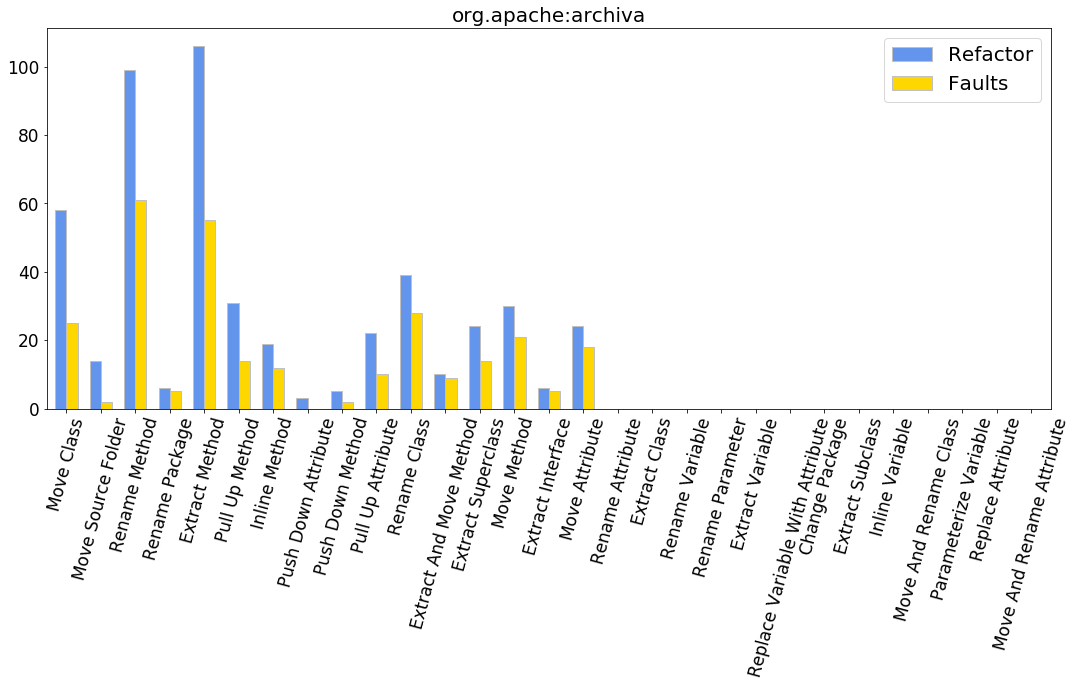

In [6]:
projects_refactor = get_project_refactor(refactoring_miner)
projects_faults = get_project_faults(refactoring_miner, szz_fault_inducing_commits, fault_commits)

plot_refactor_faults(projects_refactor, projects_faults, 'org.apache:archiva')

org.apache:batik


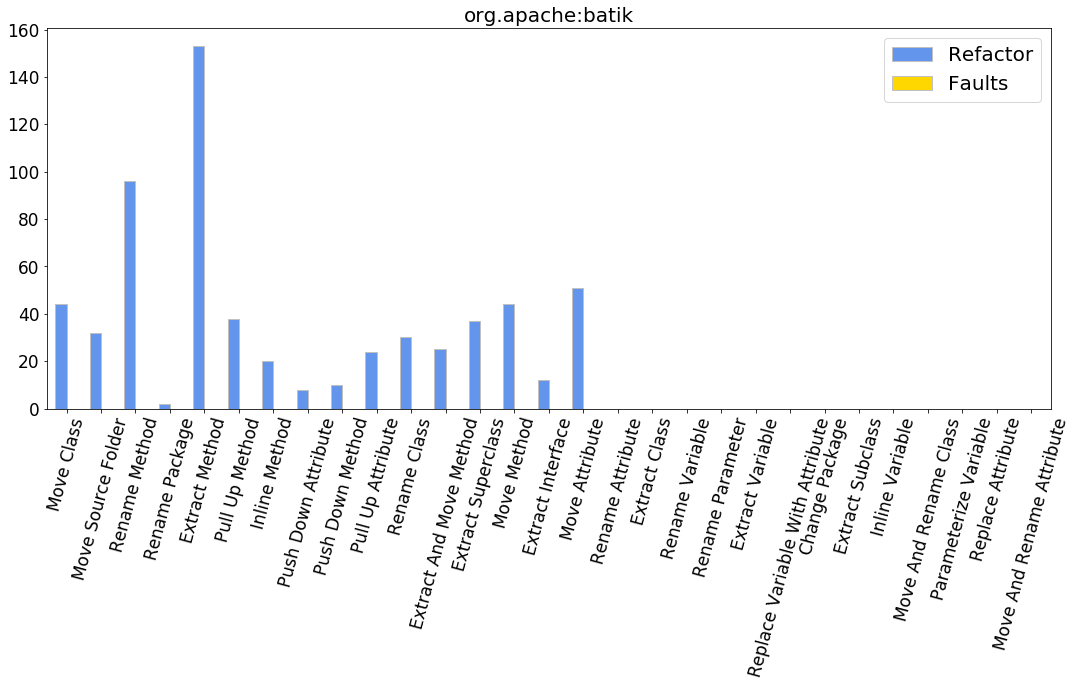

In [21]:
save_plot_refactor_faults(projects_refactor, projects_faults, 'org.apache:batik')

In [13]:
os.chdir('../reports/deploy/static/images')

org.apache:archiva
org.apache:batik
org.apache:bcel
org.apache:beanutils
org.apache:cayenne
org.apache:cocoon
org.apache:codec
org.apache:collections
org.apache:commons-cli
org.apache:commons-fileupload
org.apache:commons-io
org.apache:commons-jelly
org.apache:commons-jexl
org.apache:configuration
org.apache:daemon
org.apache:dbcp
org.apache:dbutils
org.apache:digester
org.apache:felix
org.apache:jxpath
org.apache:net


/Users/marinarosell/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


org.apache:santuario
org.apache:thrift
org.apache:validator
org.apache:vfs
org.apache:zookeeper
org.apache:httpclient
org.apache:httpcore


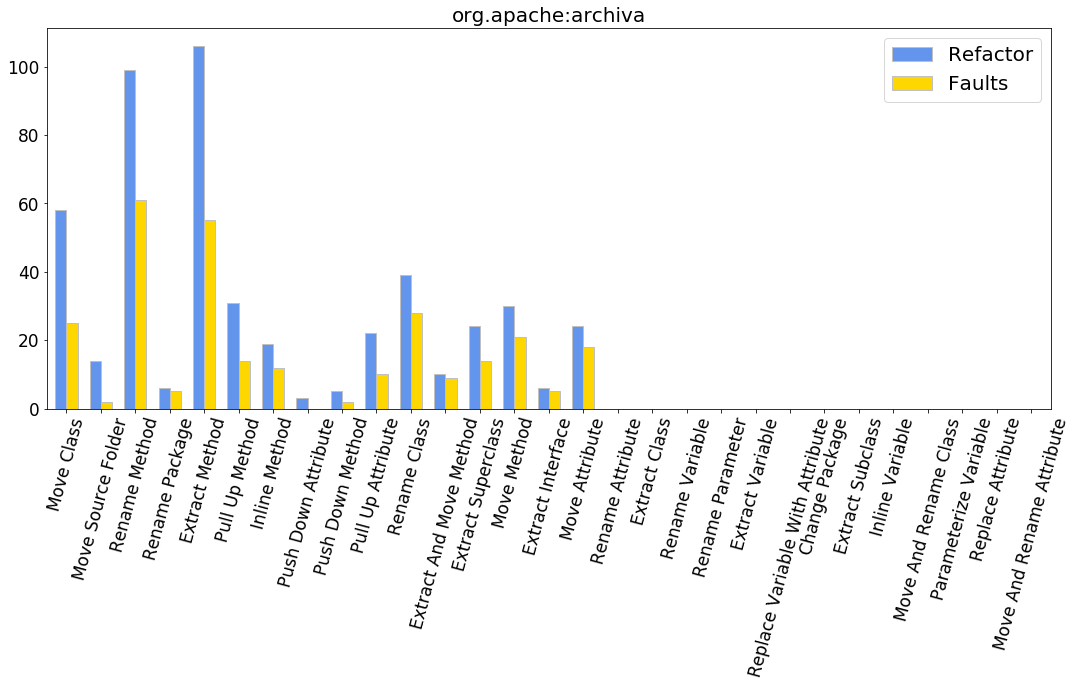

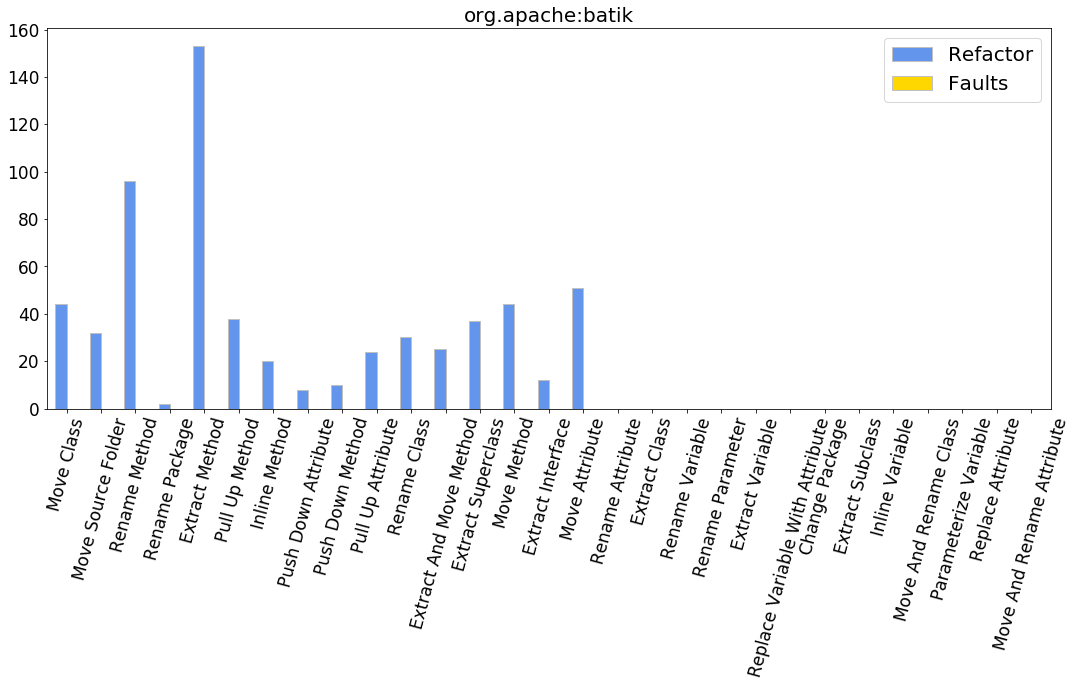

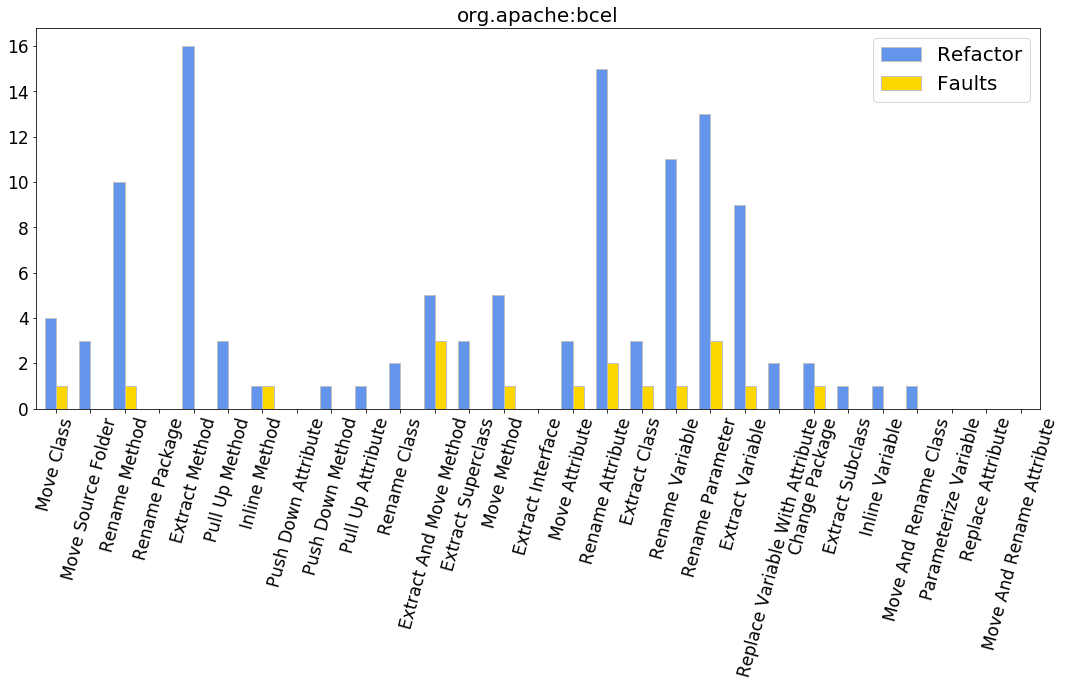

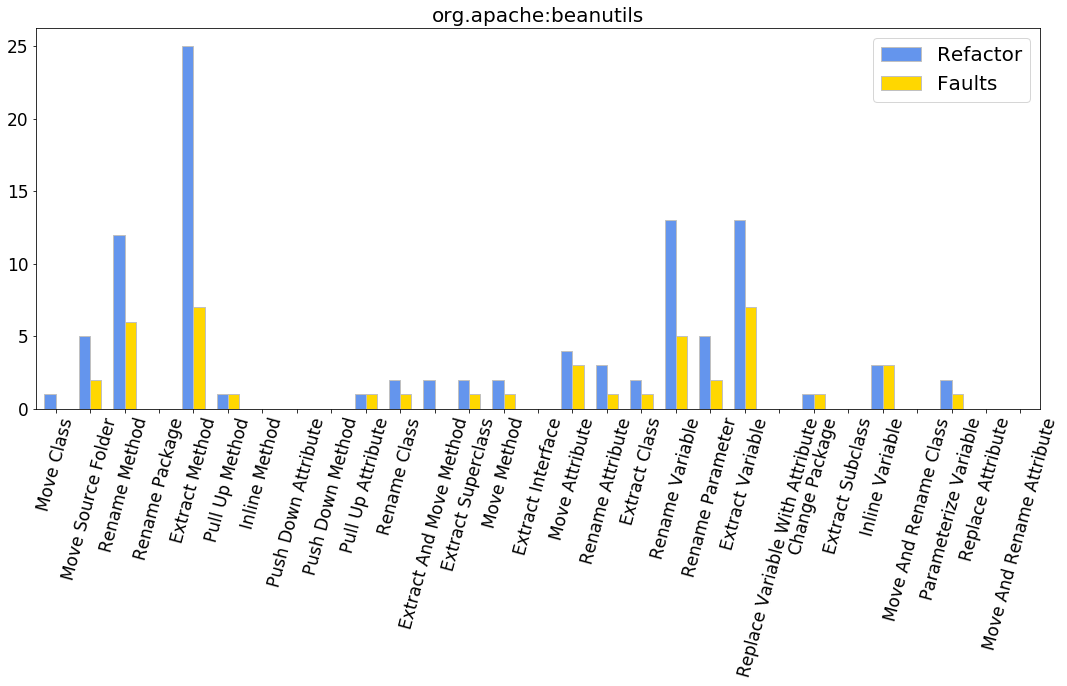

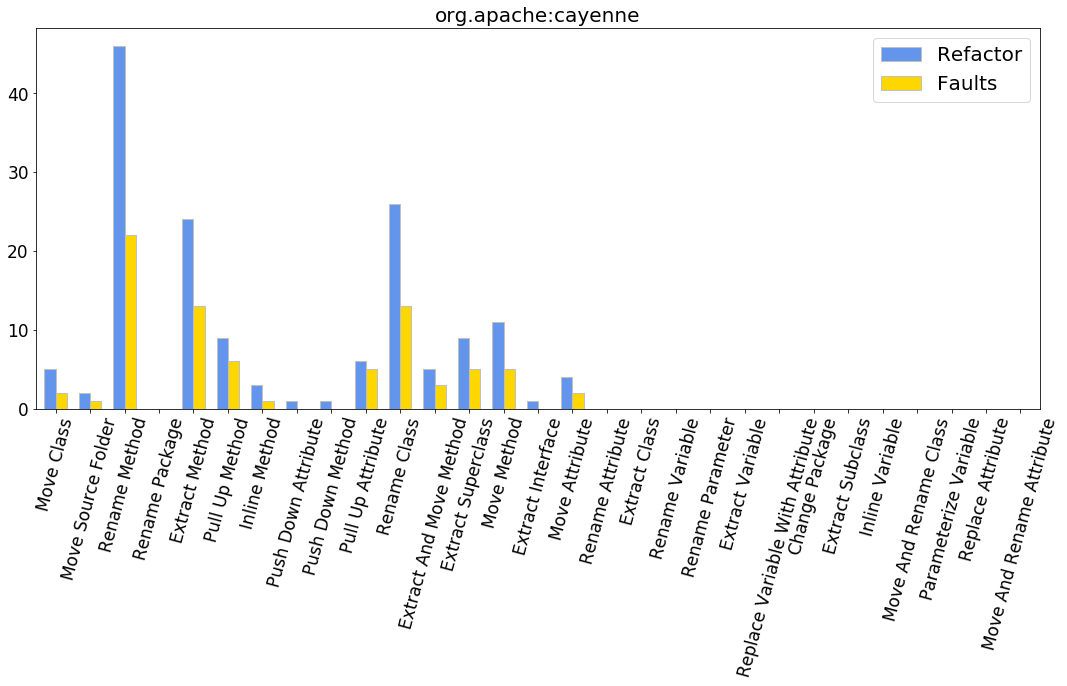

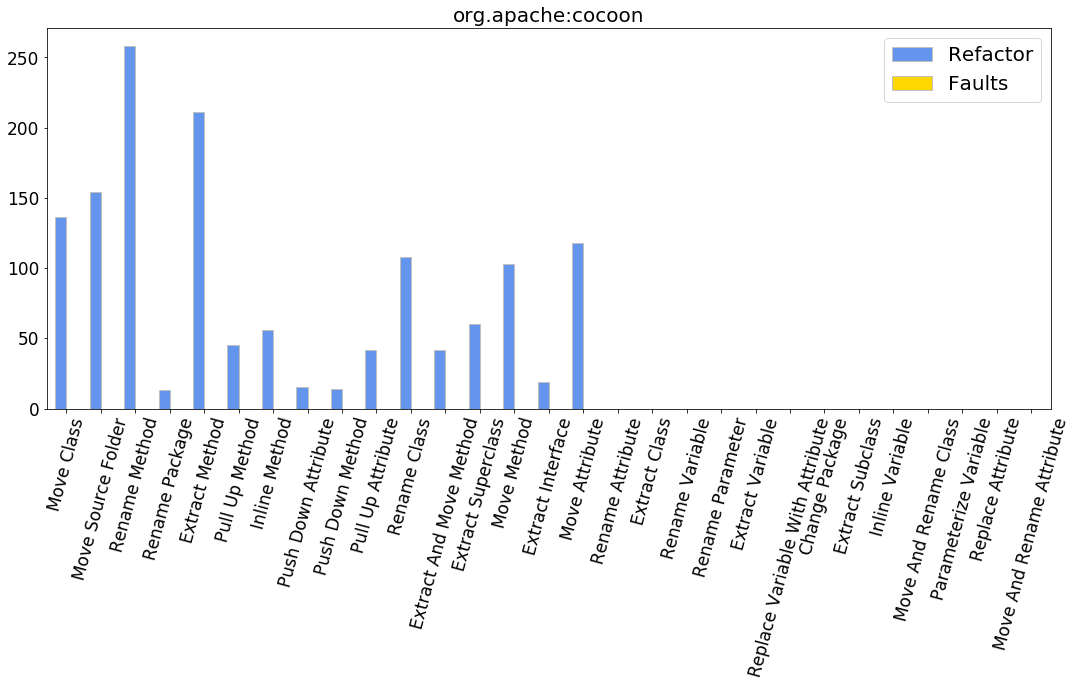

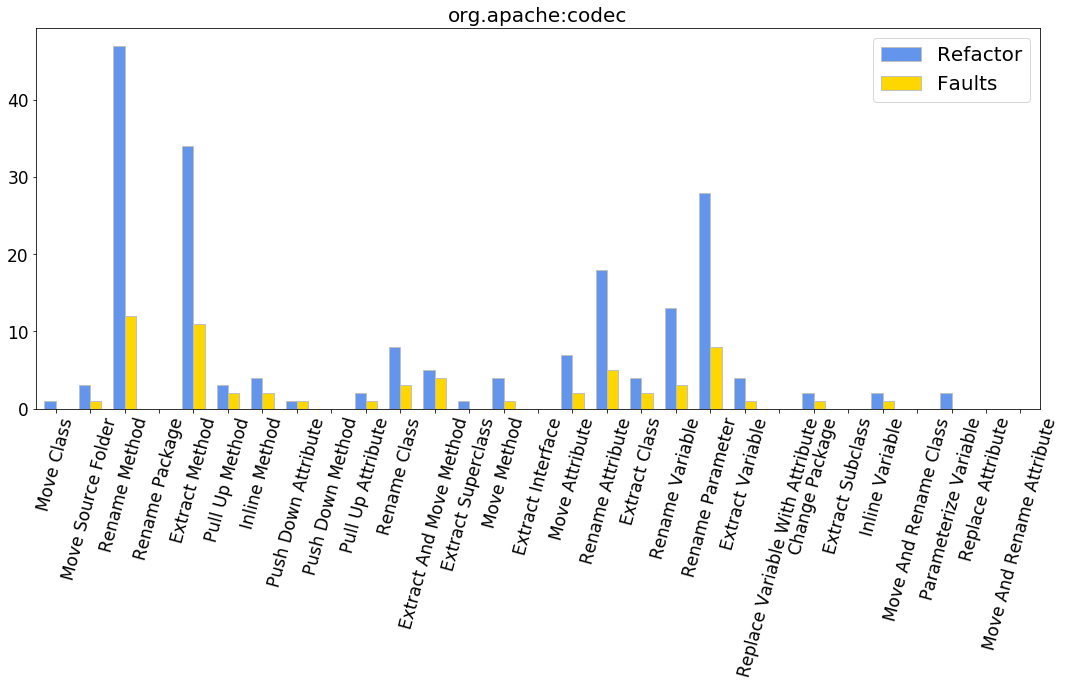

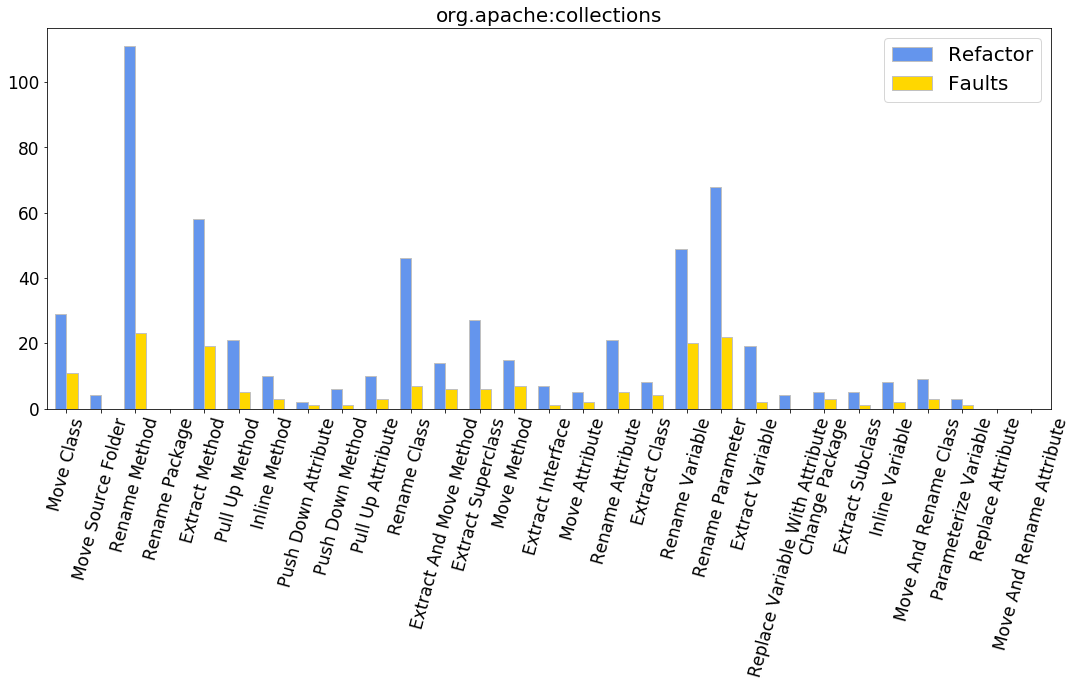

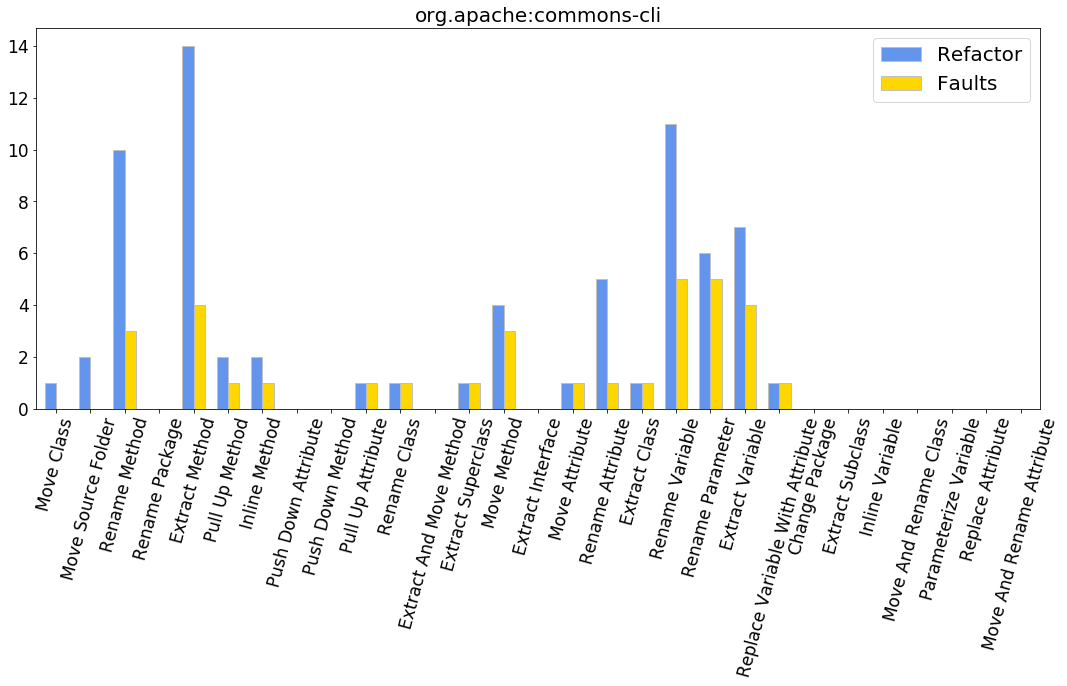

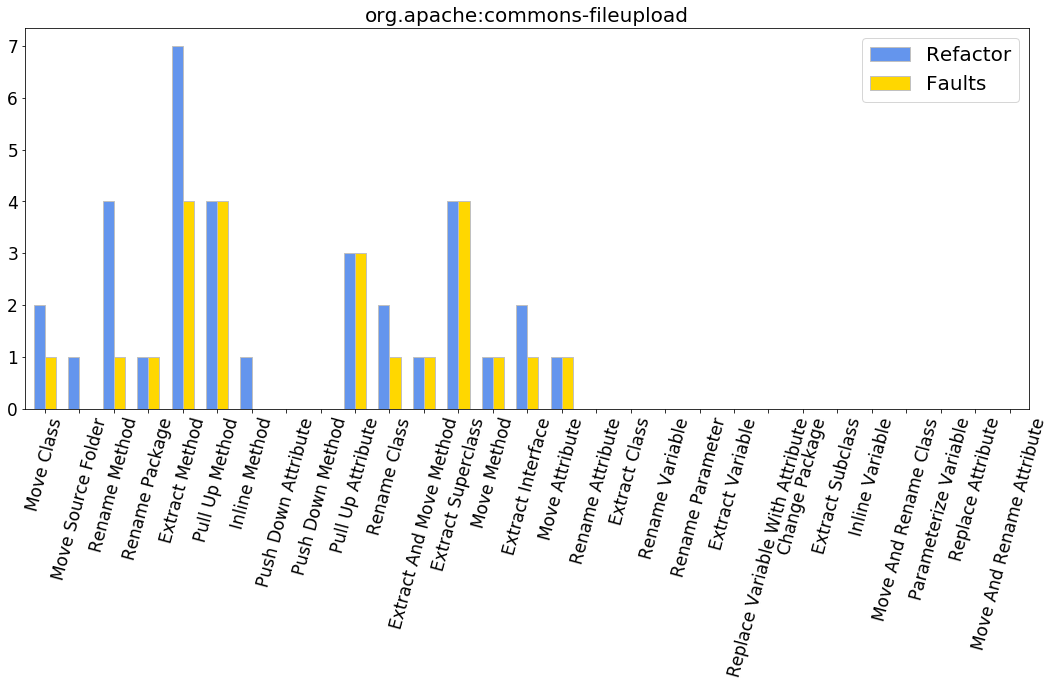

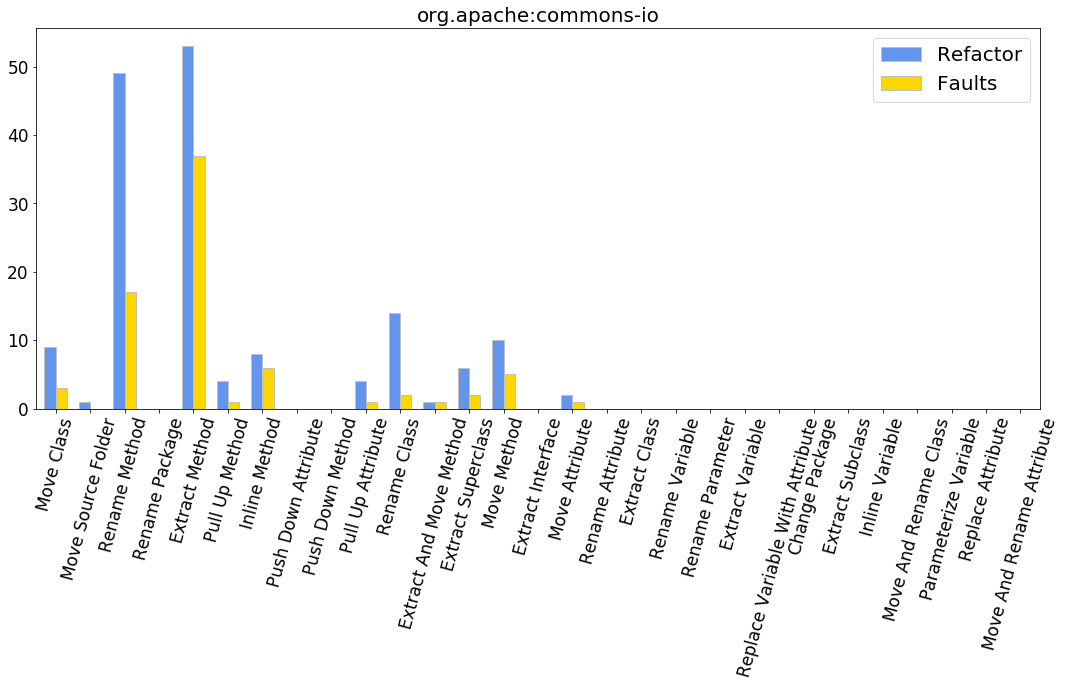

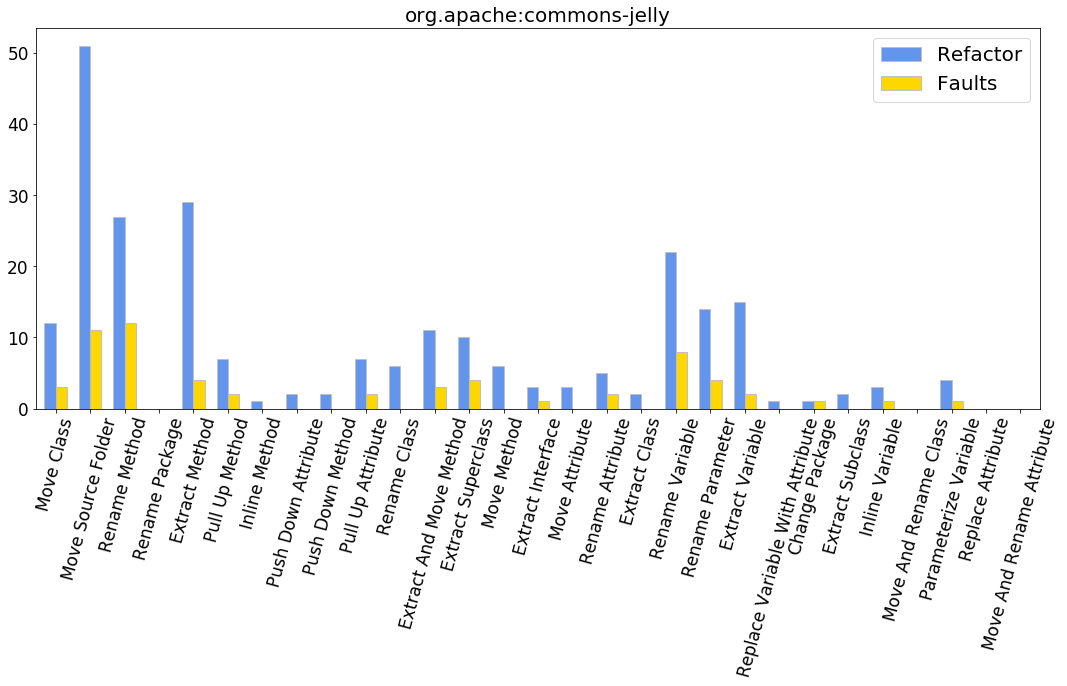

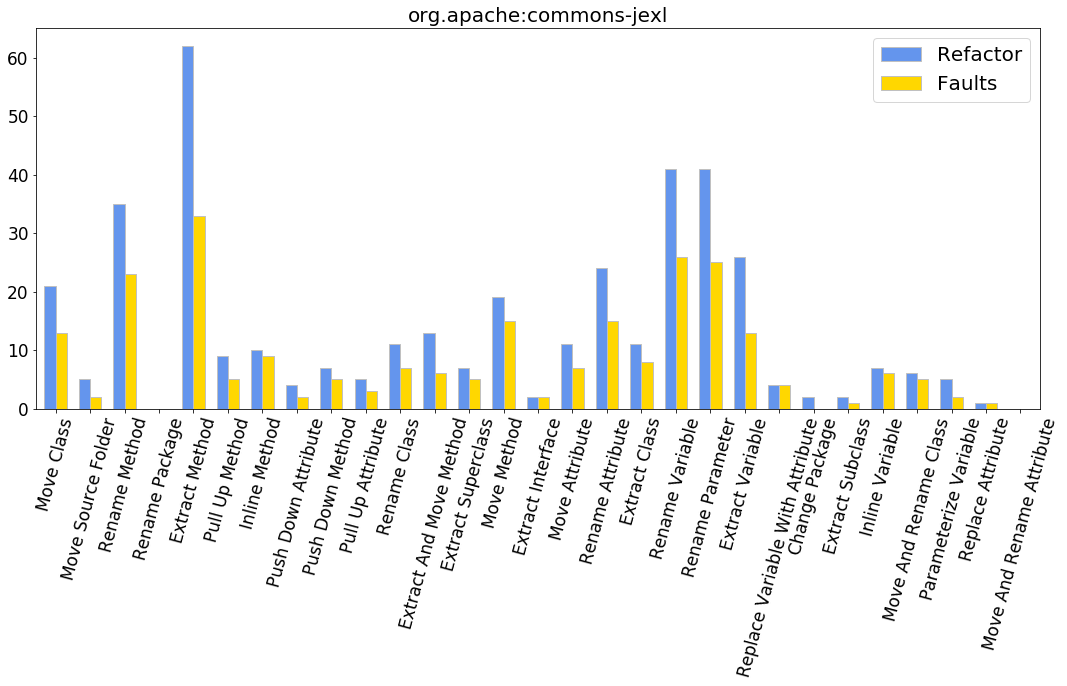

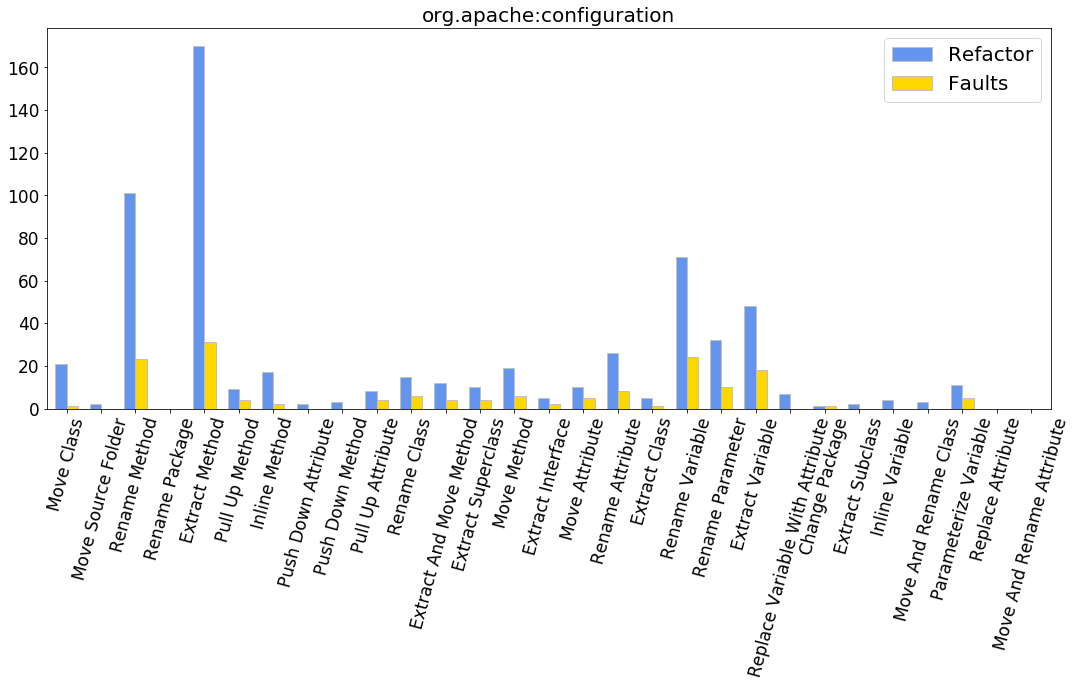

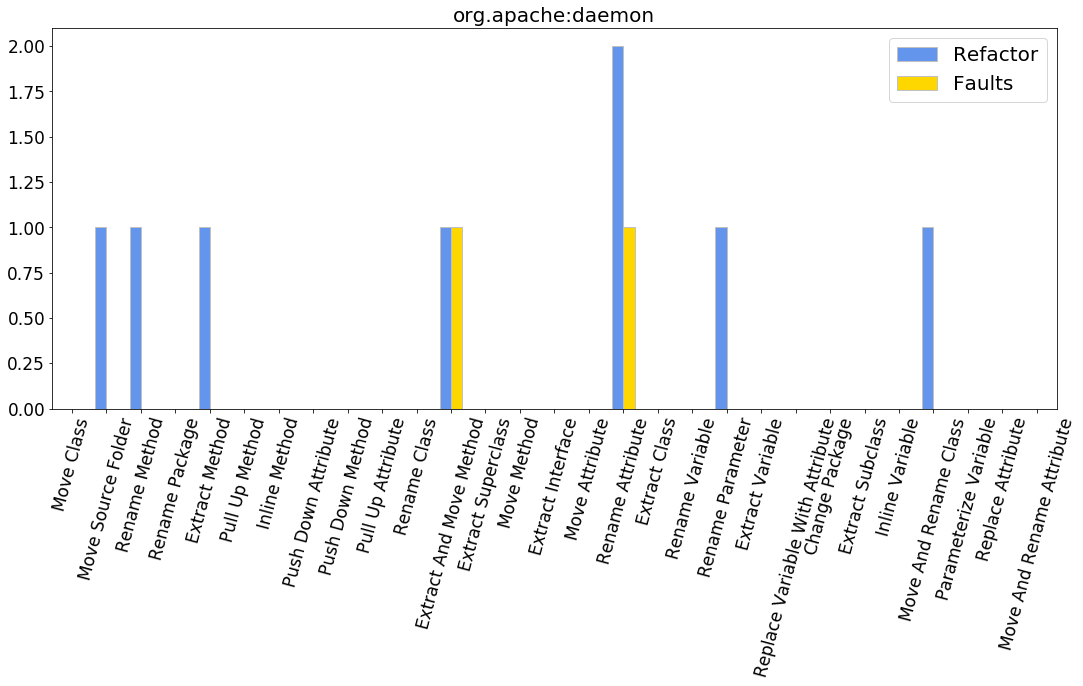

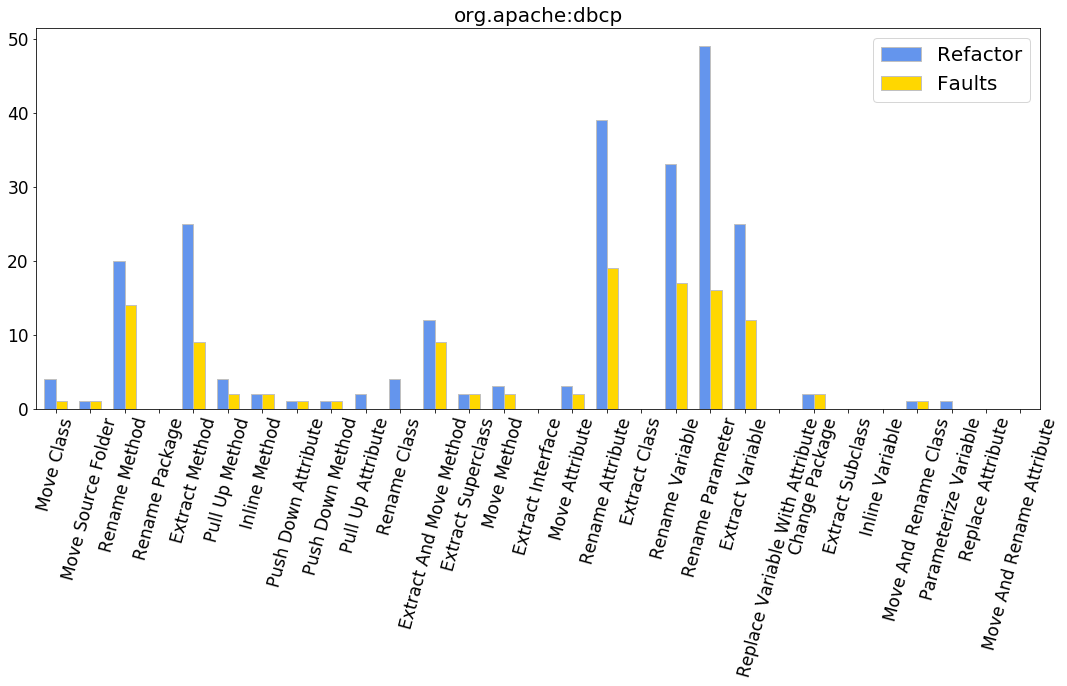

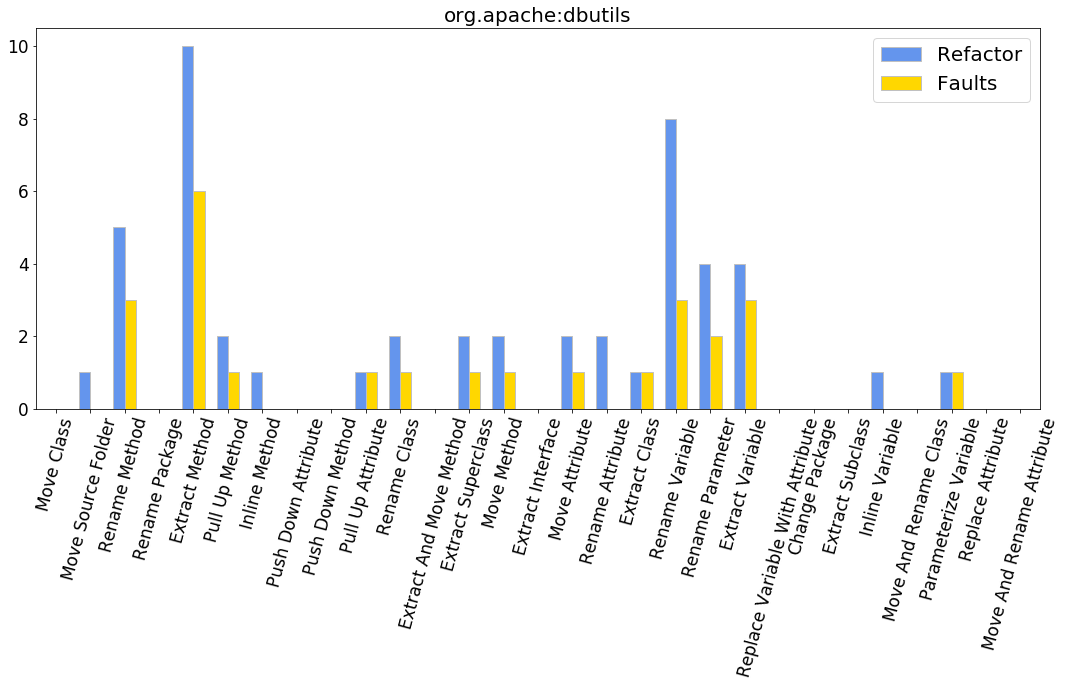

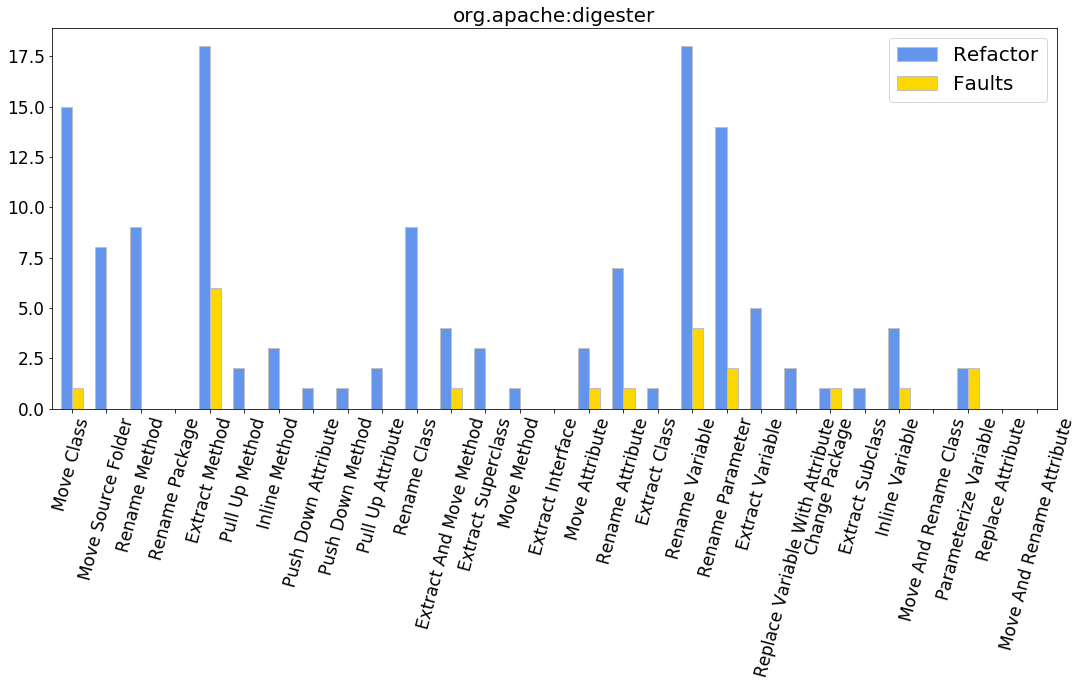

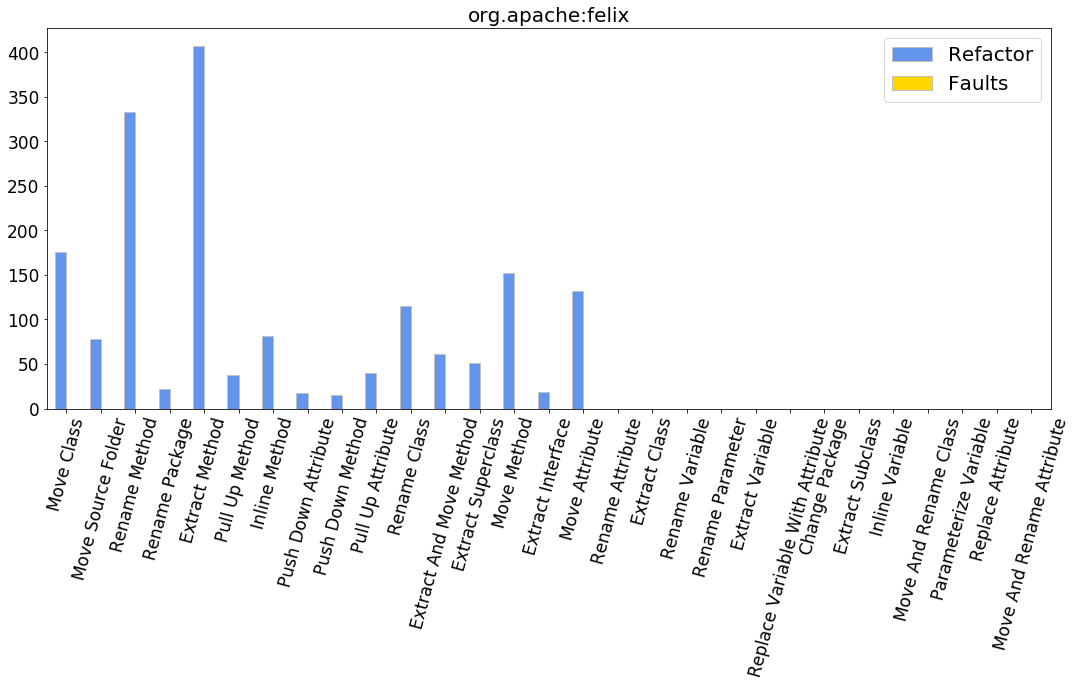

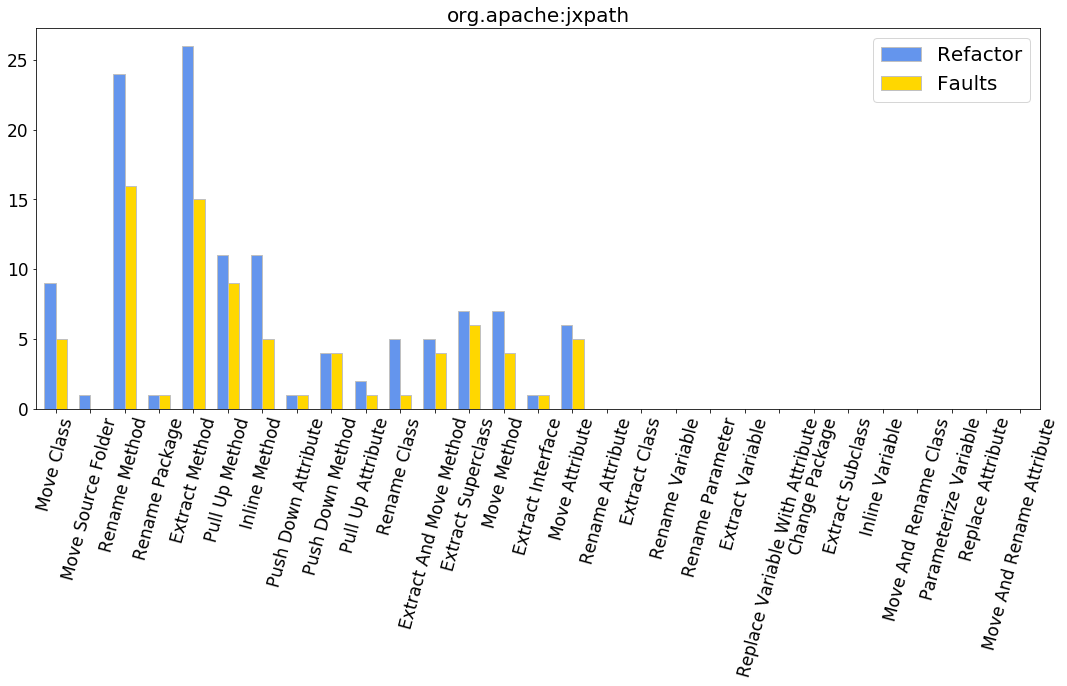

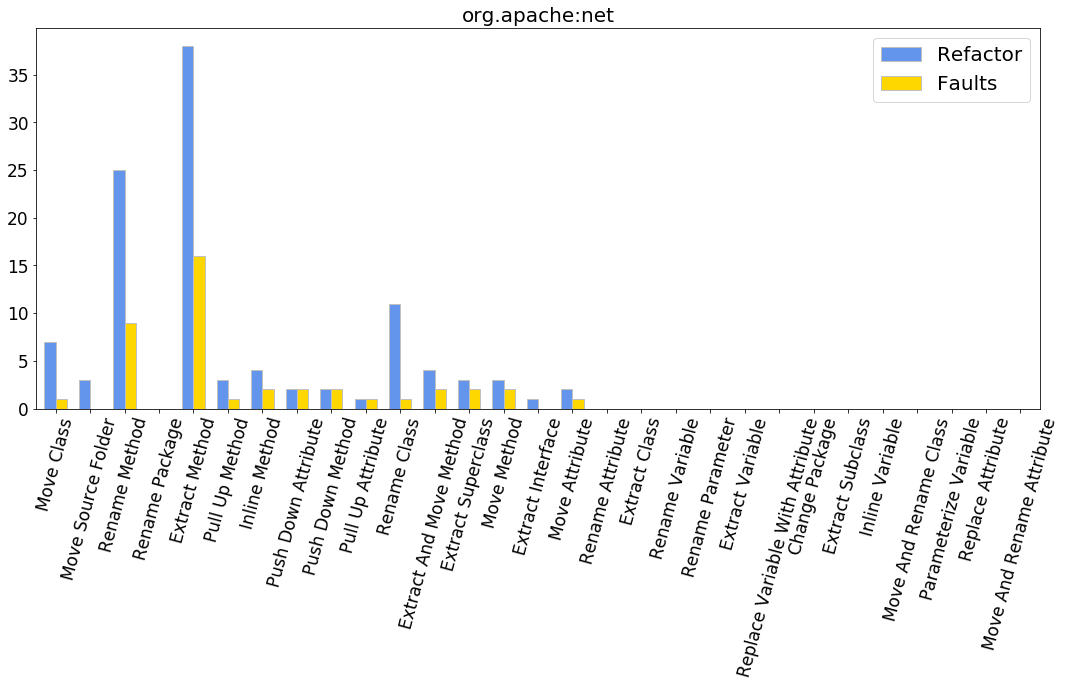

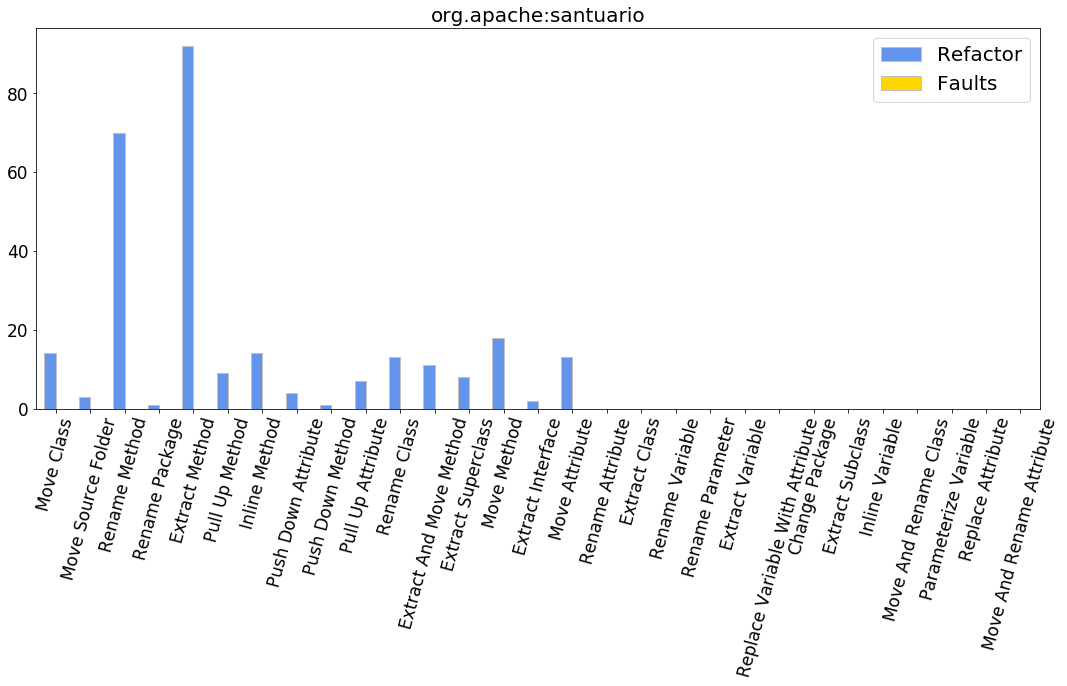

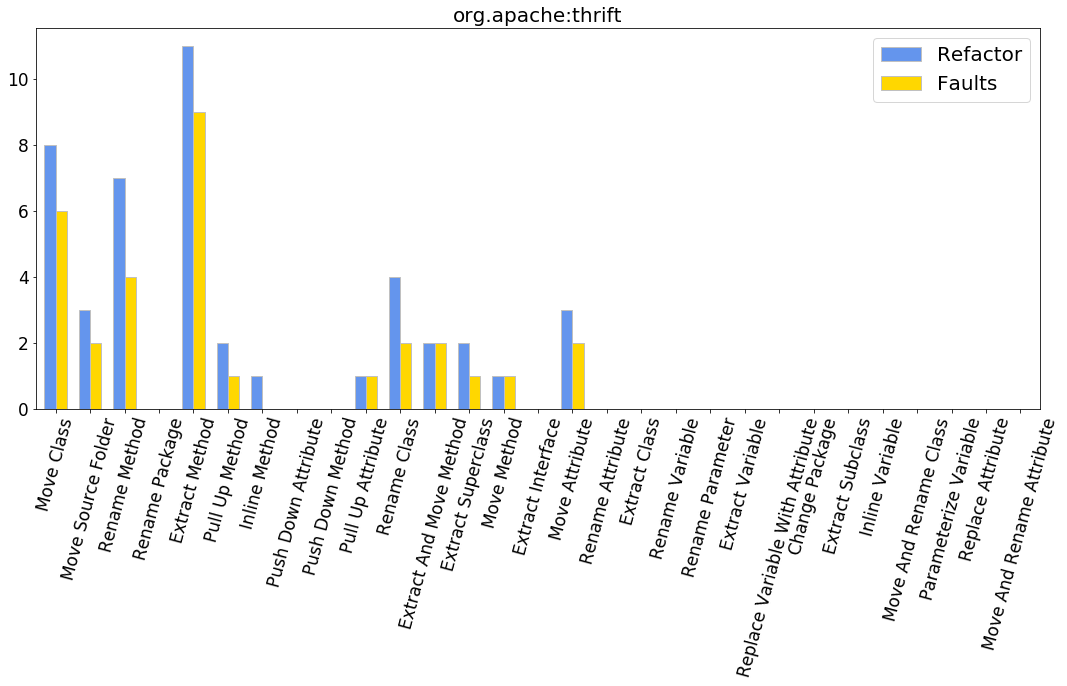

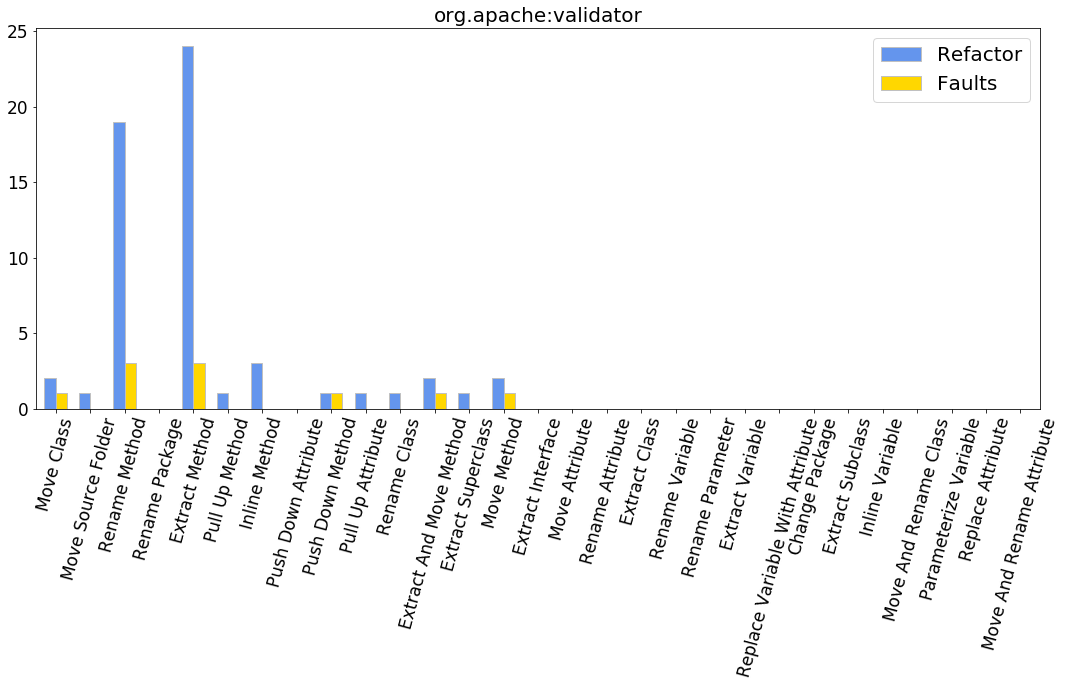

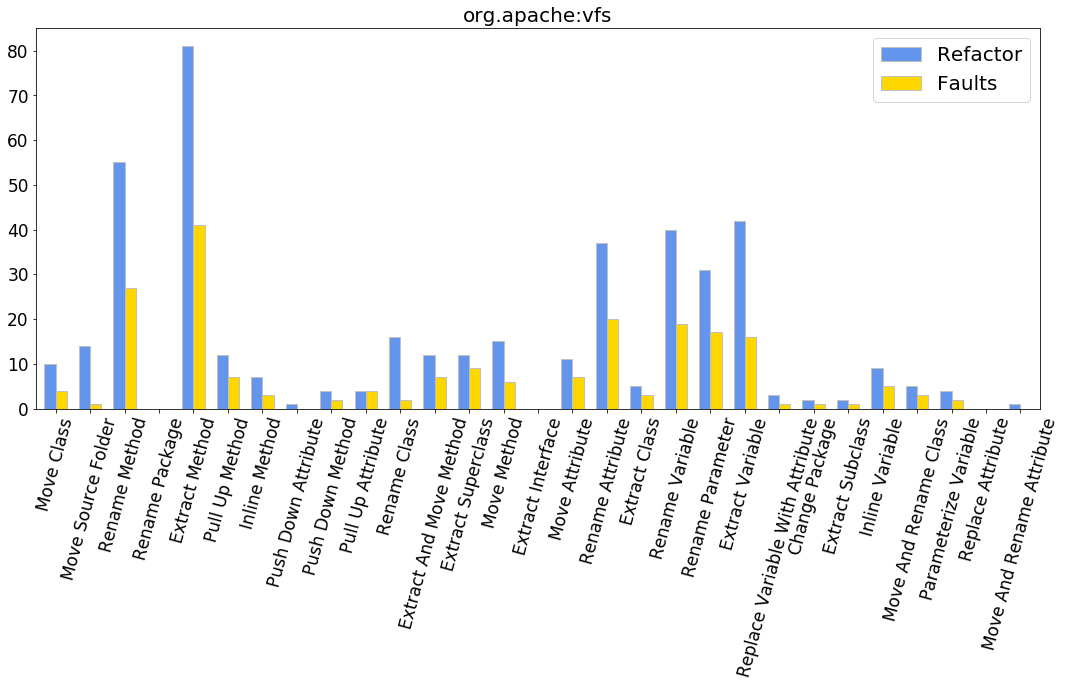

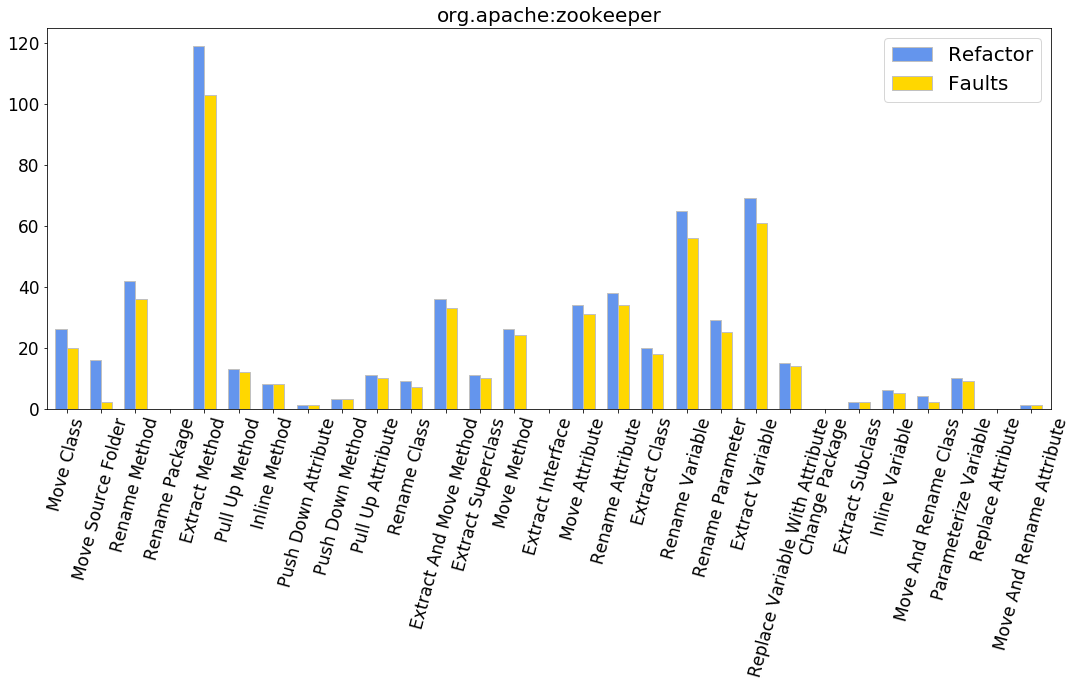

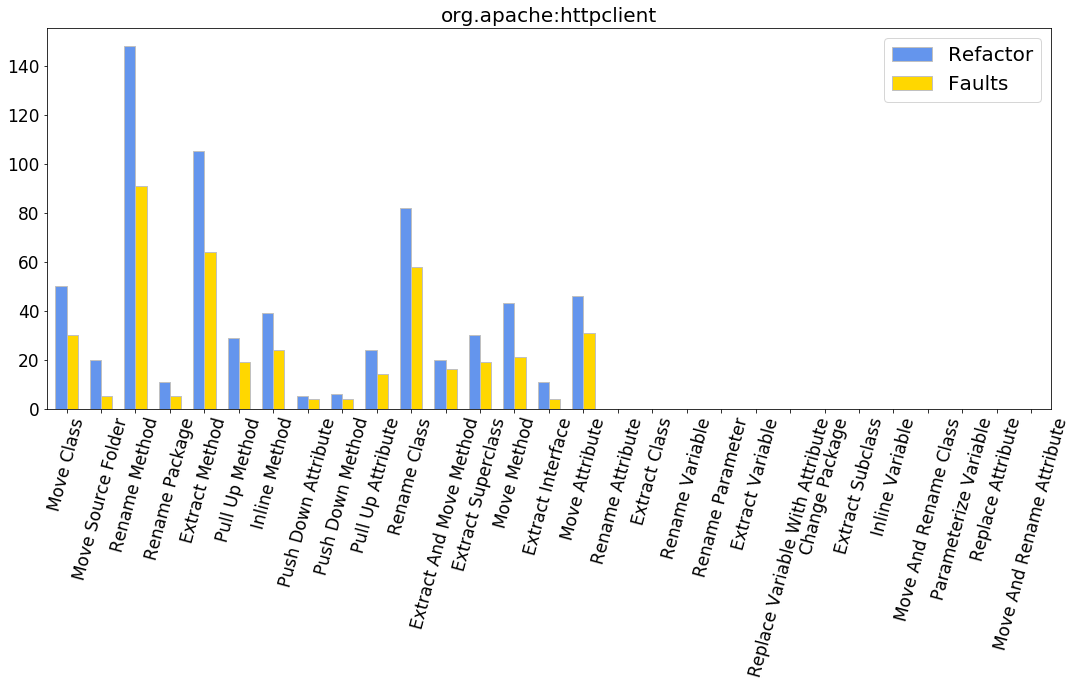

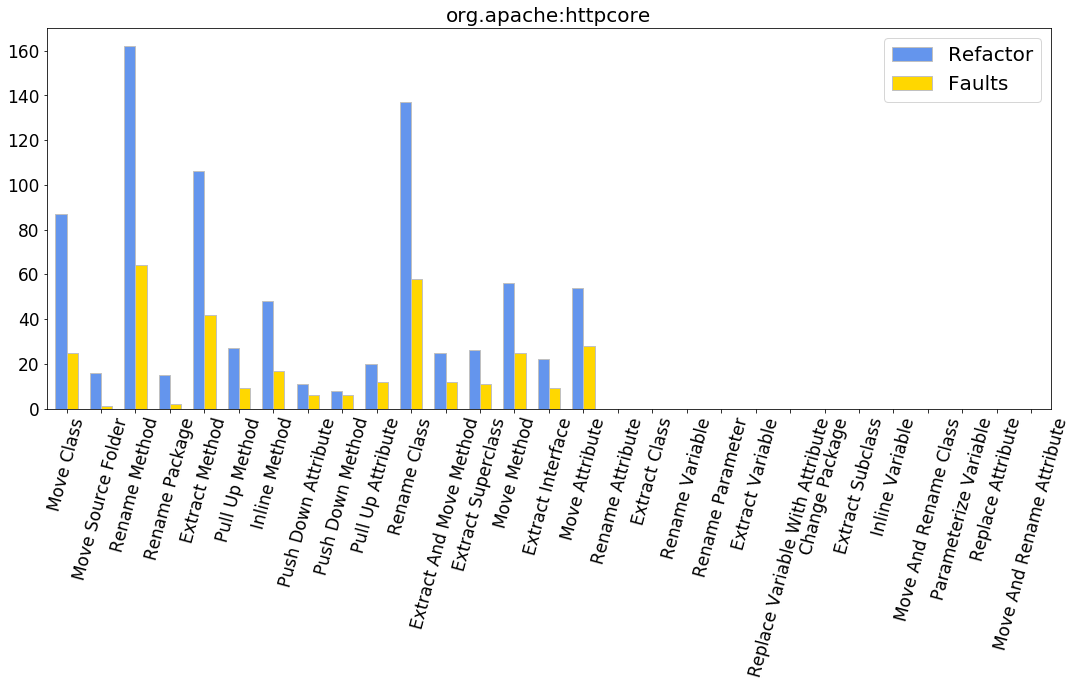

In [27]:
for proj in pd.DataFrame(projects_faults).columns:
    save_plot_refactor_faults(projects_refactor, projects_faults, proj)

In [28]:
set(pd.DataFrame(projects_faults).columns) - set(pd.DataFrame(projects_refactor).columns)

set()